<a href="https://colab.research.google.com/github/avakkyan/Itmo_phys/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A1%D0%B2%D1%8F%D0%B7%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B0%D1%8F%D1%82%D0%BD%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 4. «Связанные маятники». 6 баллов.**
Два одинаковых математических маятника, связанных пружиной с коэффициентом
жёсткости 𝑘 на расстоянии 𝐿1 от точки крепления маятников. Точки крепления обоих
связанных маятников находятся на одном уровне. Оба математических маятника имеют
одинаковые длины подвеса 𝐿 и массы 𝑚 (см. Рис.). Сила сопротивления для каждого
маятника прямо пропорциональна скорости. Коэффициент затухания каждого маятника
равен β. **Для заданных начальных отклонений построить графики зависимостей углов и скоростей от времени для каждого маятника.** Найти нормальные частоты. Параметры
должны задаваться.


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Зададим параметры системы, где

*   L - длина подвеса, м
*   m - масса, Н/м
*k - жесткость пружины, кг/с
*beta - коэффициент затухания м/с^2
*g - ускорение свободного падения, м/с^2


In [2]:
L = 1.0
m = 1.0
k = 1.0
beta = 0.1
g = 9.81

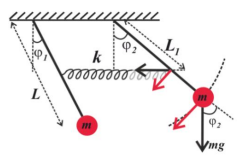

Зададим начальные условия, где



*   phy - начальный угол маятника, рад
*   omega - начальная угловая скорость для первого маятника



In [3]:
phy1_0 = 0.2
phy2_0 = -0.2
omega1_0 = 0.0
omega2_0 = 0.0

**Эти строки определяют первые производные углов по времени, которые равны угловым скоростям. Это математическое выражение закона движения угла: изменение угла со временем равно угловой скорости.**

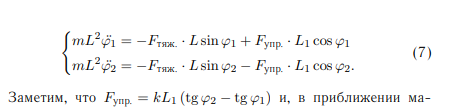

Заметим, что **𝐹упр. = 𝑘𝐿1 (tg 𝜙2 − tg 𝜙1)**
и, в приближении малых отклонений маятников от их положения равновесия, выполняются приблизительные соотношения sin 𝜙 ≈ tg 𝜙 ≈ 𝜙. Упругой сила пружины, которая стремится вернуть маятники в равновесное положение относительно друг друга.

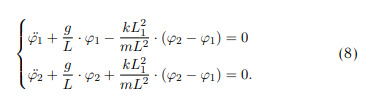

 𝑔/L -  это квадрат собственной частоты математического маятника в отсутствии затуханий.

**−(beta/(m∗L))∗omega1**: компонент затухания, который учитывает потери энергии из-за трения воздуха или механического сопротивления. Он действует противоположно omega1. Вывод происходдит через каноническое уравнение (5) методчки стр.5-6, но с учётом коэффицинта затухания.

In [4]:
# Определение уравнений движения в системе
def equations(t, y):
    phy1, omega1, phy2, omega2 = y

    # Уравнения движения для каждого маятника
    dphy1_dt = omega1
    dphy2_dt = omega2
    domega1_dt = (-g/L) * np.sin(phy1) - (k/m) * (phy1 - phy2) - (beta/(m*L)) * omega1
    domega2_dt = (-g/L) * np.sin(phy2) + (k/m) * (phy1 - phy2) - (beta/(m*L)) * omega2

    return [dphy1_dt, domega1_dt, dphy2_dt, domega2_dt]

dphy1_dt: Эти строки определяют первые производные углов по времени, которые равны угловым скоростям. Это математическое выражение закона движения угла: изменение угла со временем равно угловой скорости. То есть, это скорость изменения угла первого маятника

domega1_dt: Это производная угловой скорости первого маятника по времени, которая представляет угловое ускорение. Это значение вычисляется на основе суммы моментов сил, действующих на первый маятник.

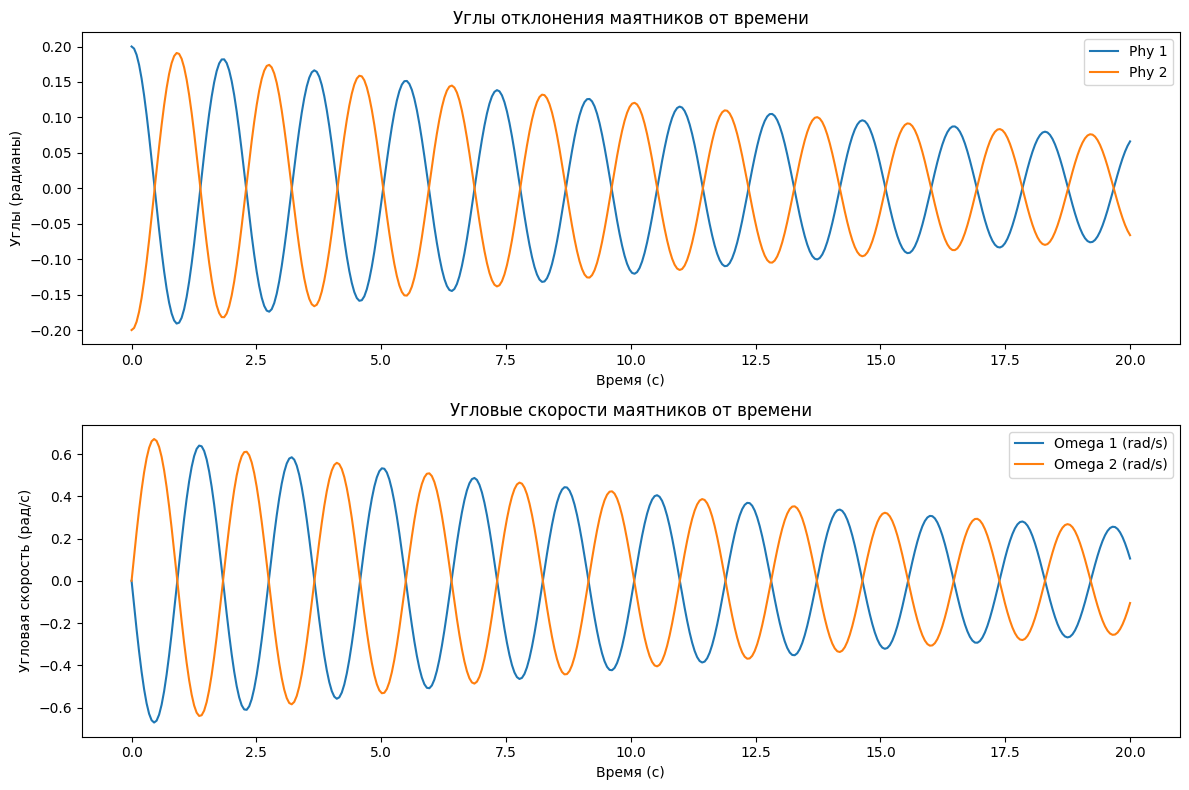

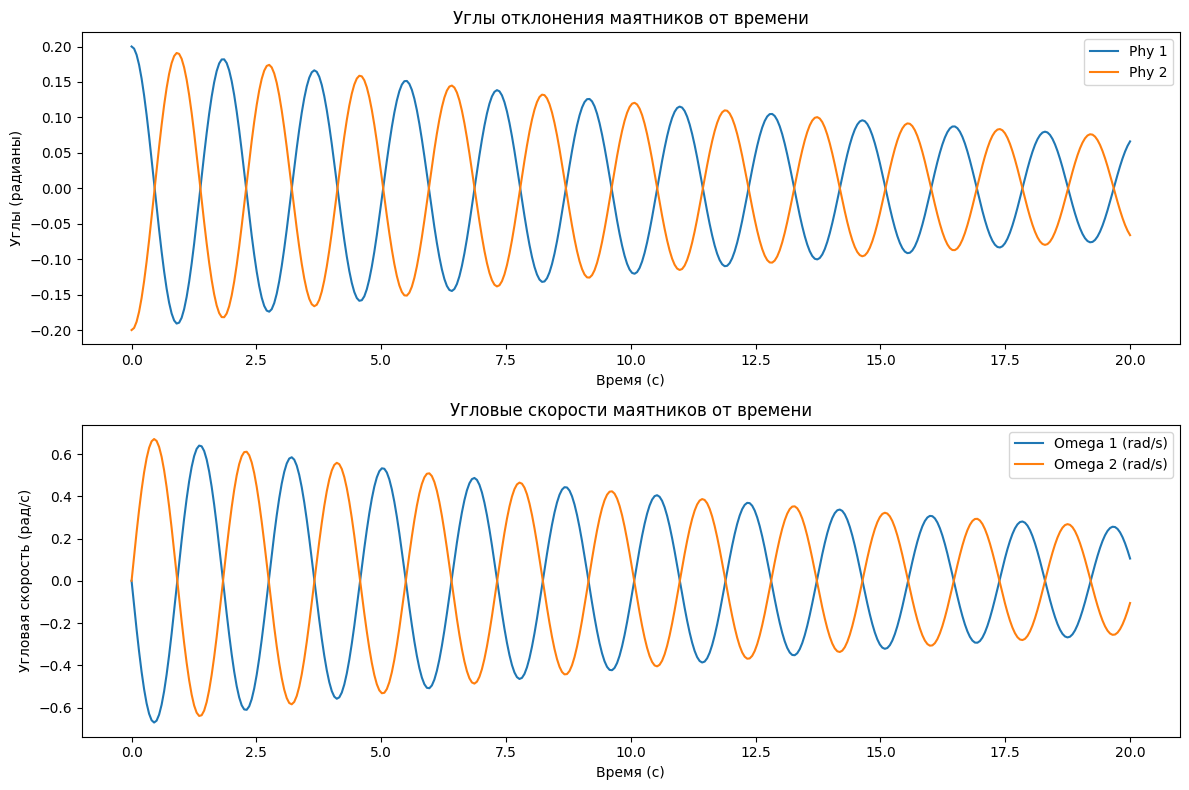

In [7]:

# Временной диапазон симуляции
t_span = (0, 20)
t_eval = np.linspace(0, 20, 400)  # 400 временных точек для графиков

# Решение системы дифференциальных уравнений
initial_conditions = [phy1_0, omega1_0, phy2_0, omega2_0]
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Визуализация результатов
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(solution.t, solution.y[0], label='Phy 1')
plt.plot(solution.t, solution.y[2], label='Phy 2')
plt.title('Углы отклонения маятников от времени')
plt.xlabel('Время (с)')
plt.ylabel('Углы (радианы)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(solution.t, solution.y[1], label='Omega 1 (rad/s)')
plt.plot(solution.t, solution.y[3], label='Omega 2 (rad/s)')
plt.title('Угловые скорости маятников от времени')
plt.xlabel('Время (с)')
plt.ylabel('Угловая скорость (рад/с)')
plt.legend()

plt.tight_layout()
plt.show()


Приступим к нахождению нормальных частот
Собственные значения системы, учитывающие затухание и связь между маятниками через пружину, выражены в комплексном виде. Каждое собственное значение состоит из действительной части, которая отражает затухание, и мнимой части, которая связана с частотой колебаний.

статя: https://phys.libretexts.org/Courses/University_of_California_Davis/UCD%3A_Physics_9HA__Classical_Mechanics/8%3A_Small_Oscillations/8.4%3A_Coupled_Oscillators_and_Normal_Modes

In [ ]:
import numpy as np
from scipy.linalg import eig

# Матрица системы с учетом затухания
A = np.array([
    [0, 1, 0, 0],
    [-(g/L + k/(m*L)), -beta/(m*L**2), k/(m*L), 0],
    [0, 0, 0, 1],
    [k/(m*L), 0, -(g/L + k/(m*L)), -beta/(m*L**2)]
])

# Расчет собственных значений
eigenvalues, _ = eig(A)

# Собственные значения содержат комплексные частоты
frequencies = np.abs(eigenvalues.imag) / (2 * np.pi)  # перевод в герцы
damping_factors = -eigenvalues.real / (2 * np.sqrt(eigenvalues.real**2 + eigenvalues.imag**2))

# Вывод результатов
for i in range(len(frequencies)):
    print(f"Собственное значение {i+1}: {eigenvalues[i]}")
    print(f"Частота колебаний {i+1}: {frequencies[i]:.3f} Гц")



Собственное значение 1: (-0.04999999999999995+3.4362043012603314j)
Частота колебаний 1: 0.547 Гц
Собственное значение 2: (-0.04999999999999995-3.4362043012603314j)
Частота колебаний 2: 0.547 Гц
Собственное значение 3: (-0.049999999999999975+3.1316928329579206j)
Частота колебаний 3: 0.498 Гц
Собственное значение 4: (-0.049999999999999975-3.1316928329579206j)
Частота колебаний 4: 0.498 Гц
